Jairo Saul Diaz Soto

Dr. Thomas Pierre Robert Batard

Vision Computacional I

# Ejercicio 1: Implementacion de operaciones basicas

## Derivada hacia delante

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from scipy.signal.windows import gaussian
import copy

In [2]:
def forward_difference_x(image):
    kernel = np.array([[-1, 1]])
    dx = cv2.filter2D(image, -1, kernel)

    return dx

def forward_difference_y(image):
    kernel = np.array([[-1], [1]])
    dy = cv2.filter2D(image, -1, kernel)

    return dy

## Derivadas hacia atras

In [3]:
def backward_difference_x(image):
    kernel = np.array([[1, -1]])
    dx = cv2.filter2D(image, -1, kernel)

    return dx

def backward_difference_y(image):
    kernel = np.array([[1], [-1]])
    dy = cv2.filter2D(image, -1, kernel)

    return dy

## Funciones Gradiente y Divergencia

In [4]:
def calcular_gradiente(image):
    dx = forward_difference_x(image)
    dy = forward_difference_y(image)
    
    return dx, dy

def calcular_divergencia(image_x, image_y):
    dx = backward_difference_x(image_x)
    dy = backward_difference_y(image_y)
    
    divergence = dx + dy

    return divergence

# Ejercicio 2: Eliminacion de ruido y desenfoque conjunto

In [5]:
from scipy.signal import convolve

def fast_gaussian_convolution(u, sigma):
    # Crear el kernel gaussiano 1D
    gaussian_kernel_1d_1 = gaussian(u.shape[0], sigma)
    gaussian_kernel_1d_2 = gaussian(u.shape[1], sigma)
    
    # Expandir a 2D
    gaussian_kernel_2d = np.outer(gaussian_kernel_1d_1, gaussian_kernel_1d_2)
    gaussian_kernel_2d /= np.sum(gaussian_kernel_2d)  # Normalizar el kernel
    
    # Expandir a 3D para cada canal de color
    gaussian_kernel_3d = np.stack([gaussian_kernel_2d] * 3, axis=2)

    # Aplicar la convolución para cada canal utilizando convolve
    convolucionada = np.zeros_like(u)
    for channel in range(u.shape[2]):
        convolucionada[:, :, channel] = convolve(u[:, :, channel], gaussian_kernel_2d, mode='same')
    
    return convolucionada

## Implementando el algoritmo

In [6]:
def grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm):
    u0 = copy.deepcopy(img)
    u = copy.deepcopy(img)
    k=0
    while k<kmax :
        if k == 5:
            print(np.mean((u - up)**2))
        if k>0 and np.mean((u - up)**2) < epsilon:
            break;
        gradx, grady = calcular_gradiente(u)
        norm = gradx**2 + grady**2
        den = np.sqrt(eta + norm)
        div = calcular_divergencia(gradx/den, grady/den)
        Auk = fast_gaussian_convolution(u, sigma)
        ft = fast_gaussian_convolution(Auk - u0, sigma)
        up = copy.deepcopy(u)
        u = u - alpha*(ft - (lm*(div)))
        k+=1
    print(np.mean((u - up)**2))
    print(k)
    return u

## Probando el algoritmo

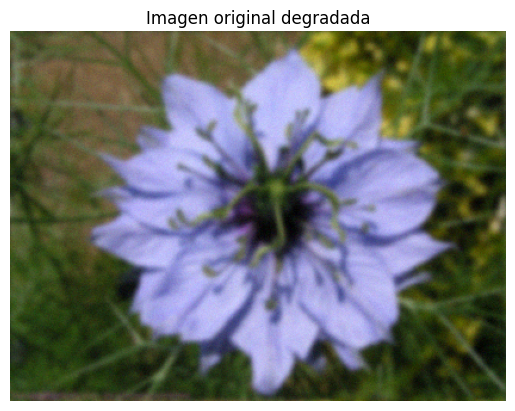

In [7]:
img = cv2.imread("assignment5/img1_degradation1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original degradada')
plt.show()

In [8]:
alpha = 0.01
eta = 0.0001
epsilon = 0.001
kmax = 15000
sigma = 2

In [9]:
img_res1 = grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm=0)
img_res2 = grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm=2)
img_res3 = grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm=5)
img_res4 = grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm=10)
img_res5 = grad_desc_img_rest(img, alpha, eta, sigma, kmax, epsilon, lm=0.5)

0.00233217872713529
0.000993208077513722
80
0.0034665105054008023


KeyboardInterrupt: 

In [ ]:
img_res1 = img_res1.astype(np.uint8)
img_res2 = img_res2.astype(np.uint8)
img_res3 = img_res3.astype(np.uint8)
img_res4 = img_res4.astype(np.uint8)
img_res5 = img_res5.astype(np.uint8)
img_res1 = np.clip(img_res1, 0, 255)
img_res2 = np.clip(img_res2, 0, 255)
img_res3 = np.clip(img_res3, 0, 255)
img_res4 = np.clip(img_res4, 0, 255)
img_res5 = np.clip(img_res5, 0, 255)

In [ ]:
plt.imshow(img_res1)
plt.show()
plt.imshow(img_res2)
plt.show()
plt.imshow(img_res3)
plt.show()
plt.imshow(img_res4)
plt.show()
plt.imshow(img_res5)
plt.show()

In [ ]:
img_org = cv2.imread('assignment5/img1.png')
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_org)
plt.axis('off')
plt.title('Imagen original')
plt.show()

In [ ]:
print("lambda=0, psnr=", cv2.PSNR(img_org, img_res1))
print("lambda=2, psnr=", cv2.PSNR(img_org, img_res2))
print("lambda=5, psnr=", cv2.PSNR(img_org, img_res3))
print("lambda=10, psnr=", cv2.PSNR(img_org, img_res4))
print("lambda=0.5, psnr=", cv2.PSNR(img_org, img_res5))

In [ ]:
plt.imshow(img_res2)
plt.axis('off')
plt.title("Mejor PSNR")
plt.show()

# Ejercicio 3: Denoising

## Implementando la funcion

In [10]:
def grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm):
    u0 = copy.deepcopy(img)
    u = copy.deepcopy(img)
    k=0
    while k<kmax :
        if k == 5:
            print(np.mean((u - up)**2))
        if k>0 and np.mean((u - up)**2) < epsilon:
            break;
        gradx, grady = calcular_gradiente(u)
        norm = gradx**2 + grady**2
        den = np.sqrt(eta + norm)
        div = calcular_divergencia(gradx/den, grady/den)
        up = copy.deepcopy(u)
        u = u - alpha*((u-u0) - (lm*(div)))
        k+=1
    print(np.mean((u - up)**2))
    print(k)
    return u

## Probando la funcion

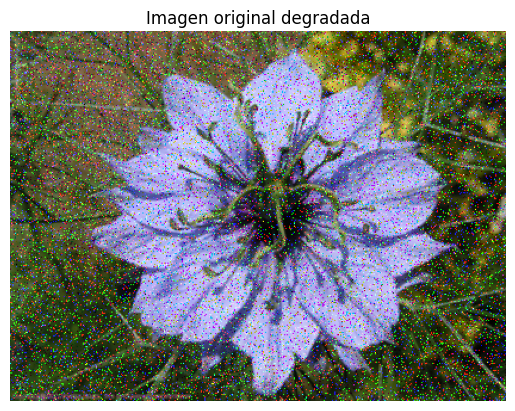

In [11]:
img = cv2.imread("assignment5/img1_degradation2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original degradada')
plt.show()

In [ ]:
alpha = 0.01
eta = 0.0001
epsilon = 0.001
kmax = 15000
sigma = 2

In [ ]:
img_res1 = grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm=0)
img_res2 = grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm=2)
img_res3 = grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm=5)
img_res4 = grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm=10)
img_res5 = grad_desc_img_denoising(img, alpha, eta, sigma, kmax, epsilon, lm=0.5)

In [ ]:
img_res1 = img_res1.astype(np.uint8)
img_res2 = img_res2.astype(np.uint8)
img_res3 = img_res3.astype(np.uint8)
img_res4 = img_res4.astype(np.uint8)
img_res5 = img_res5.astype(np.uint8)
img_res1 = np.clip(img_res1, 0, 255)
img_res2 = np.clip(img_res2, 0, 255)
img_res3 = np.clip(img_res3, 0, 255)
img_res4 = np.clip(img_res4, 0, 255)
img_res5 = np.clip(img_res5, 0, 255)

In [ ]:
plt.imshow(img_res1)
plt.show()
plt.imshow(img_res2)
plt.show()
plt.imshow(img_res3)
plt.show()
plt.imshow(img_res4)
plt.show()
plt.imshow(img_res5)
plt.show()

In [ ]:
img_org = cv2.imread('assignment5/img1.png')
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_org)
plt.axis('off')
plt.title('Imagen original')
plt.show()

In [ ]:
print("lambda=0, psnr=", cv2.PSNR(img_org, img_res1))
print("lambda=2, psnr=", cv2.PSNR(img_org, img_res2))
print("lambda=5, psnr=", cv2.PSNR(img_org, img_res3))
print("lambda=10, psnr=", cv2.PSNR(img_org, img_res4))
print("lambda=0.5, psnr=", cv2.PSNR(img_org, img_res5))

In [ ]:
plt.imshow(img_res2)
plt.axis('off')
plt.title("Mejor PSNR")
plt.show()

# Ejercicio 4

Sea la funcion
$$
    E(u) = \frac{1}{2} \int_\omega ||u(x) - u_0(x)||^2dx - \frac{\gamma}{4} \int_\omega \int_\omega w(x,y)||u(x)-u(y)||^2dxdy
$$
Entonces su gradiente seria
$$
    \nabla E(u) = u(x) - u_0(x) - \gamma\int_\omega w(x,y)(u(x)-u(y))dy
$$
Observando el termino de la integral esta se puede reescribir tal que
$$
    u(x) \int_\omega w(x,y)dy - \int_\omega w(x,y)u(y)dy
$$
Al ser w(x,y) un kernel gaussiano, el primer termino se vuelve uno por las condiciones de normalizacion mientras que el segundo termino corresponde a la convolucion entre ambas funciones por lo que el gradiente final seria
$$
    \nabla E(u) = u - u_0 - \gamma(u - u*w)
$$

## Implementando el algoritmo

In [12]:
def fast_gaussian_convolution(u, sigma):
    # Crear el kernel gaussiano 1D
    gaussian_kernel_1d_1 = gaussian(u.shape[0], sigma)
    gaussian_kernel_1d_2 = gaussian(u.shape[1], sigma)
    
    # Expandir a 2D
    gaussian_kernel_2d = np.outer(gaussian_kernel_1d_1, gaussian_kernel_1d_2)
    gaussian_kernel_2d /= np.sum(gaussian_kernel_2d)  # Normalizar el kernel
    
    # Obtener la cantidad de canales de la imagen de entrada
    num_channels = u.shape[2]

    # Expandir a 3D para cada canal de color
    gaussian_kernel_3d = np.stack([gaussian_kernel_2d] * num_channels, axis=2)

    # Aplicar la convolución para cada canal utilizando convolve
    convolucionada = np.zeros_like(u)
    for channel in range(num_channels):
        convolucionada[:, :, channel] = convolve(u[:, :, channel], gaussian_kernel_2d, mode='same')
    
    return convolucionada

In [13]:
def grad_desc_img_enhance(img, alpha, sigma1,sigma2, kmax, epsilon, lm1, lm2):
    Lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    L0 = copy.deepcopy(np.asarray([Lab[:,:,0]]))
    L0 = np.transpose(L0, (1, 2, 0))
    O01 = copy.deepcopy(np.asarray([Lab[:,:,1]]))
    O01 = np.transpose(O01, (1, 2, 0))
    print(O01.shape)
    O02 = copy.deepcopy(np.asarray([Lab[:,:,2]]))
    O02 = np.transpose(O02, (1, 2, 0))
    print(O02.shape)
    L = copy.deepcopy(np.asarray([Lab[:,:,0]]))
    L = np.transpose(L, (1, 2, 0))
    O1 = copy.deepcopy(np.asarray([Lab[:,:,1]]))
    O1 = np.transpose(O1, (1, 2, 0))
    O2 = copy.deepcopy(np.asarray([Lab[:,:,2]]))
    O2 = np.transpose(O2, (1, 2, 0))
    ##Luminosidad
    k=0
    while k<kmax :
        if k == 5:
            print(np.mean((L - Lp)**2))
        if k>0 and np.mean((L - Lp)**2) < epsilon:
            break;
        conv = fast_gaussian_convolution(L, sigma1)
        Lp = copy.deepcopy(L)
        L = L - alpha*((L-L0) - (lm1*(L - conv)))
        k+=1
    ##Color
    print(np.mean((L - Lp)**2))
    print(k)
    k=0
    while k<kmax :
        if k == 5:
            print(np.mean((O1 - O1p)**2))
        if k>0 and np.mean((O1 - O1p)**2) < epsilon:
            break;
        conv = fast_gaussian_convolution(O1, sigma2)
        O1p = copy.deepcopy(O1)
        O1 = O1 - alpha*((O1-O01) - (lm2*(O1 - conv)))
        k+=1
    print(np.mean((O1 - O1p)**2))
    print(k)
    k=0
    while k<kmax :
        if k == 5:
            print(np.mean((O2 - O2p)**2))
        if k>0 and np.mean((O2 - O2p)**2) < epsilon:
            break;
        conv = fast_gaussian_convolution(O2, sigma2)
        O2p = copy.deepcopy(O2)
        O2 = O2 - alpha*((O2-O02) - (lm2*(O2 - conv)))
        k+=1
    print(np.mean((O2 - O2p)**2))
    print(k)
    return cv2.merge((L,O1, O2))

## Probando el algoritmo

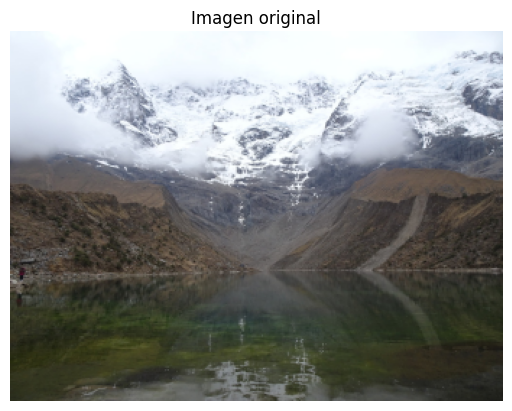

In [14]:
img = cv2.imread("assignment5/img2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original')
plt.show()

In [52]:
alpha = 0.05
epsilon = 0.0001
kmax = 15000
sigma1 = 5
sigma2 = 3000
lm1 = 0.05
lm2 = 0.1

In [53]:
img_res = grad_desc_img_enhance(img, alpha, sigma1,sigma2, kmax, epsilon, lm1, lm2)

(256, 341, 1)
(256, 341, 1)
0.0026137164739900693
9.079206318822819e-05
39
0.058018440838683745
9.290436662297379e-05
72
0.0633401067846494
9.397885087903477e-05
73


In [54]:
img_res_int = img_res.astype(np.uint8)
img_res_rgb = cv2.cvtColor(img_res_int, cv2.COLOR_Lab2RGB)

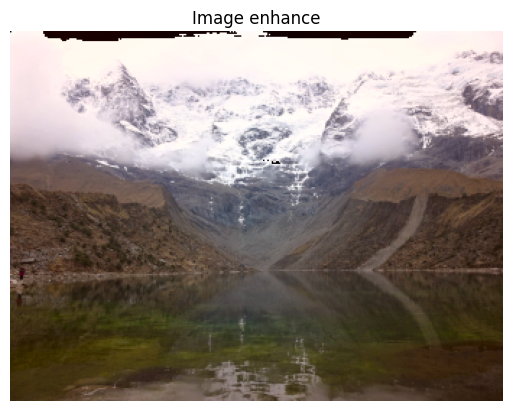

In [55]:
plt.imshow(img_res_rgb)
plt.axis('off')
plt.title("Image enhance")
plt.show()

In [56]:
img_res_bgr = cv2.cvtColor(img_res_rgb, cv2.COLOR_RGB2BGR)

In [57]:
cv2.imwrite("assignment5/img2m.png", img_res_bgr)

True